In [1]:
import numpy as np 
from matplotlib import pyplot as plt 

## Creating a Synthetic dataset

In [2]:
array1 = np.random.normal(loc = 10 , scale = 1 , size = 20 )
array2 = np.random.normal(loc = 15 , scale = 1 , size = 20 )

array3 = np.random.normal(loc = 15 , scale = 1.2 , size = 20 )
array4 = np.random.normal(loc = 20 , scale = 1.2 , size = 20 )

In [3]:
array2

array([16.8234608 , 13.09332105, 13.77083767, 15.70070148, 13.36116077,
       15.95978151, 13.95412156, 14.67867409, 14.61716533, 13.75794344,
       15.94573882, 14.82255736, 13.67977221, 14.59701698, 15.71364204,
       14.97498553, 17.01719942, 14.67798601, 14.14170045, 17.22415888])

In [31]:
label1 = np.ones(len(array1))
label2 = np.full(len(array2), -1)
labels = np.hstack((label1,label2))

In [40]:
labels

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1.])

In [33]:
labels[-1]

-1.0

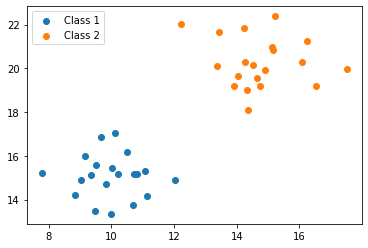

In [34]:
plt.scatter(array1,array2, label = "Class 1")
plt.scatter(array3,array4, label = "Class 2" )
plt.legend()

In [35]:
array1

array([10.22765645,  9.47834172, 10.49116219, 12.01644858,  9.84152037,
        9.04187356, 11.07834535, 10.0132929 , 10.12688859, 10.69059908,
       10.72183021,  9.36584149, 10.82477469,  9.52199164,  9.6637903 ,
        9.97963581,  8.82777138,  7.79441143, 11.14868379,  9.1529836 ])

In [36]:
class1 = np.vstack((array1, array2)).T
labe1t = label1.T
class2 = np.vstack((array3, array4)).T
labe2t = label2.T

In [38]:
data = np.vstack((class1, class2))

In [39]:
data

array([[10.22765645, 15.16428493],
       [ 9.47834172, 13.49641888],
       [10.49116219, 16.15688981],
       [12.01644858, 14.90952709],
       [ 9.84152037, 14.7241537 ],
       [ 9.04187356, 14.89286945],
       [11.07834535, 15.30942459],
       [10.0132929 , 15.45230682],
       [10.12688859, 17.05275288],
       [10.69059908, 13.7654599 ],
       [10.72183021, 15.14948219],
       [ 9.36584149, 15.14377842],
       [10.82477469, 15.15221792],
       [ 9.52199164, 15.59277597],
       [ 9.6637903 , 16.87683048],
       [ 9.97963581, 13.34323749],
       [ 8.82777138, 14.18872489],
       [ 7.79441143, 15.2138577 ],
       [11.14868379, 14.14194617],
       [ 9.1529836 , 16.00024917],
       [13.91435519, 19.19652565],
       [14.52569999, 20.16872471],
       [15.1296328 , 20.98092099],
       [14.73068782, 19.17861679],
       [16.53884887, 19.18641514],
       [14.64210643, 19.57575216],
       [14.23539908, 21.86725562],
       [14.31390123, 18.9897638 ],
       [12.22950105,

## Coding the Perceptron (Single Layer Perceptron)

In [78]:
def perceptron(data, labels, d , epoch) : 

    # These are my starting parameters
    weight_vec = np.zeros(d)
    bias = 0 

    for i in range(epoch):
        for index, data_point  in enumerate(data):
            
            y = labels[index] # this gets the actual "y" from the labels array.
            # print(f"Checking {index}")
            
            if  (y * (np.dot(weight_vec, data_point) + bias )) <= 0 : # the meat : when its fails to predict and it recorrects the parameters orelse keeps same.
                weight_vec += np.dot(data_point, y)
                bias += y

    return weight_vec, bias

## Testing

- Example 1

In [79]:
perceptron(data, labels, 2, 10 )

(array([-17.91030389, -13.32956942]), 2.0)

- Example 2

In [104]:
data2 = np.array([[2,4],[5,2],[2,-20],[-2,-7],[-7,-1],[-1,5],[-2,-15]])
data2

array([[  2,   4],
       [  5,   2],
       [  2, -20],
       [ -2,  -7],
       [ -7,  -1],
       [ -1,   5],
       [ -2, -15]])

In [105]:
labels2 = np.array([1,1,1,-1,-1,-1,-1])
labels2

array([ 1,  1,  1, -1, -1, -1, -1])

In [106]:
perceptron(data2, labels2, 2, 5)

(array([24., -3.]), -2)

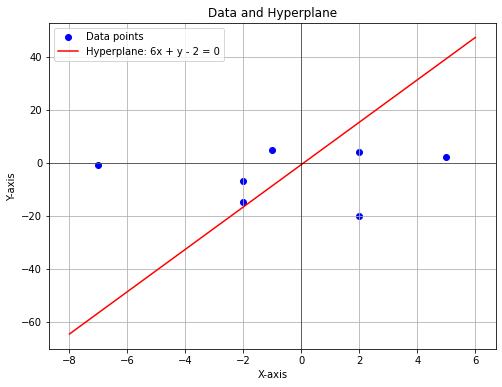

In [107]:
x_points = data2[:, 0]
y_points = data2[:, 1]

# Weight and bias (hyperplane parameters)
w,b = perceptron(data2, labels2, 2, 10)

# Define x range around your actual data
x_vals = np.linspace(x_points.min() - 1, x_points.max() + 1, 100)
y_vals = -(w[0] * x_vals + b) / w[1]

# Plot with larger figure
plt.figure(figsize=(8, 6))
plt.scatter(x_points, y_points, color='blue', label='Data points')
plt.plot(x_vals, y_vals, color='red', label='Hyperplane: 6x + y - 2 = 0')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Data and Hyperplane')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True)
plt.legend()
plt.show()